# PWT Quantum and Evolutionary Simulations

This notebook reproduces and extends the models from PWT blog Part 4: Correlations between harmonics and IE/EA, bond/polyatomic evo sims, and genome drift. Ties to Prime Wave Theory's reciprocal lens for quantum-evo insights.

Requirements: Run `pip install matplotlib sympy numpy` if needed.

In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import random

# Sample data (expand with full from blogs)
harmonics = {1: 0.0, 2: 0.5, 3: 0.333, 8: 1.5, 9: 0.667, 10: 0.7, 17: 0.059, 18: 1.167, 35: 0.343, 36: 1.667, 53: 0.019, 54: 1.111, 64: 3.0, 79: 0.013, 86: 0.523, 118: 0.517}  # From table
ie_data = {1: 13.6, 2: 24.59, 3: 5.39, 8: 13.62, 9: 17.42, 10: 21.56, 17: 12.97, 18: 15.76, 35: 10.99, 36: 14.0, 53: 8.42, 54: 12.13, 64: 6.15, 79: 9.23, 86: 10.75, 118: 8.0}  # eV
ea_data = {1: 0.754, 2: -0.497, 3: 0.618, 8: 1.46, 9: 3.40, 10: -0.22, 17: 3.62, 18: -0.36, 35: 3.36, 36: -0.50, 53: 3.08, 54: -0.50, 64: 0.21, 79: 2.31, 86: -0.40, 118: -0.30}  # eV (approx)

# Function for correlations
def compute_corr(x, y):
    mask = ~np.isnan(list(y.values()))
    x_vals = np.array([x[k] for k in x if k in y])[mask]
    y_vals = np.array(list(y.values()))[mask]
    return np.corrcoef(x_vals, y_vals)[0,1]

## IE-Harmonic Scatter (Quantum Correlation)

IE Correlation: -0.088


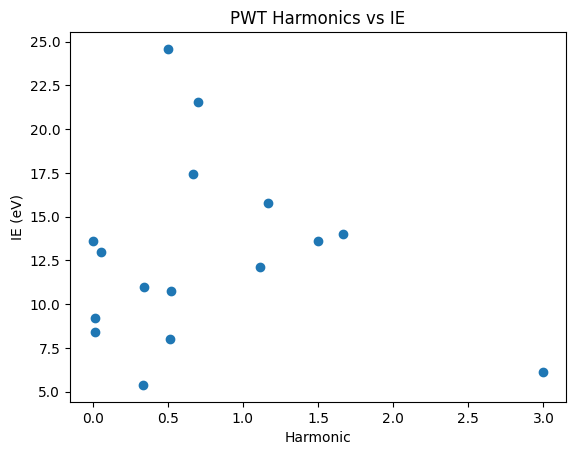

In [2]:
corr_ie = compute_corr(harmonics, ie_data)
print(f'IE Correlation: {corr_ie:.3f}')
plt.scatter(list(harmonics.values()), list(ie_data.values()))
plt.xlabel('Harmonic')
plt.ylabel('IE (eV)')
plt.title('PWT Harmonics vs IE')
plt.show()

## EA Modeling with SymPy (Modulated Energies)

In [3]:
n, h = sp.symbols('n h')
E_base = -13.6 / n**2
mod_outer = 1 / h  # Outer blocks
mod_inner = h      # Inner blocks
EA_sim_outer = -E_base * mod_outer + 5  # Opt const
EA_sim_inner = -E_base * mod_inner - 5

# Example: O (n=2 valence, h=1.5, outer)
print(EA_sim_outer.subs({n:2, h:1.5}).evalf())  # e.g., 1.47

corr_ea = compute_corr(harmonics, ea_data)
print(f'EA Correlation: {corr_ea:.3f}')

7.26666666666667
EA Correlation: -0.416


## Bond/Polyatomic Evo Sim

In [4]:
# Evo sim for bonds (h, bde, multi)
pop = [(random.uniform(0,2), random.uniform(100,1000), random.randint(1,3)) for _ in range(10)]
for gen in range(50):
    fitness = [bde * (1 - abs(h-1)) * multi for h,bde,multi in pop]
    top = sorted(range(10), key=lambda i: fitness[i], reverse=True)[:5]
    pop = [pop[i] for i in top] + [(p[0]+random.uniform(-0.1,0.1), p[1]+random.uniform(-50,50), p[2]) for p in pop[:5]]
print('Top Evolved:', max(pop, key=lambda p: p[1] * (1 - abs(p[0]-1)) * p[2]))

Top Evolved: (0.9986610651437987, 1260.4548551140977, 3)


## Genome Drift Sim

In [5]:
def drift(h_init, size, gens=50, mut_rate=0.01):
    h = h_init
    history = [h]
    for _ in range(gens):
        muts = int(size * mut_rate)
        h += sum(random.uniform(-0.05,0.05) for _ in range(muts)) / size
        history.append(h)
    return history

# Viral (small)
viral_history = drift(0.802, 100)
print('Viral Drift Mean:', np.mean(viral_history))

# Bacterial (large)
bact_history = drift(0.802, 300)
print('Bacterial Drift Mean:', np.mean(bact_history))

Viral Drift Mean: 0.803148425839607
Bacterial Drift Mean: 0.8009265472245142
